<a href="https://colab.research.google.com/github/marcoswds/chatbot_watson/blob/main/chatbots_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ibm_watson
!pip install ibm_cloud_sdk_core

     |████████████████████████████████| 389kB 16.5MB/s 
     |████████████████████████████████| 204kB 33.7MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-cp37-none-any.whl size=375439 sha256=f2f0fb3230876dd76a5d3f7bfc94278ad925be7324b5e0e2b359dc6c4ef6aaff
  Stored in directory: /root/.cache/pip/wheels/49/6d/cf/1d91261b96363da78bf9b02699fd2262e6b5dad179500690c1
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.9.0-cp37-none-any.whl size=59612 sha256=b6fb02373fe3d3af672825782847ba5e0f4a03f7397ac7145b6e5df0478a2be6
  Stored in directory: /root/.cache/pip/wheels/a2/23/f2/ae9db79b4234ed0fc74bf00bc97bcd16440ab2764c5f443167
Successfully built ibm-watson ibm-cloud-sdk-core


**Importanto as respostas da api da watson**

In [2]:
from datetime import datetime, date 
from ibm_watson import AssistantV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('2GeHgZD5hZr532ni0IRbjFuD48KQqvTETsbZ8YrmeGx4')
assistant = AssistantV1(
    version='2020-04-01',
    authenticator = authenticator
)

assistant.set_service_url('https://api.us-south.assistant.watson.cloud.ibm.com/instances/ca783aea-4e48-4abd-8435-28e0e16f6f4e')

response=assistant.list_all_logs(
    filter='language::pt-br,workspace_id::46fa65f9-fa54-4254-917d-3c3a20da7a27'
).get_result()

In [3]:
print(response)

{'logs': [{'request': {'suggestion_only': 'false', 'context': {'system': {'dialog_turn_counter': 1, 'dialog_request_counter': 1, 'session_id': '1b7c9e69-2863-473b-b12a-552a4c8277f2', 'assistant_id': 'dbe84eea-03d8-4234-929f-51f3f223fcaf', 'timezone_s': 'America/Sao_Paulo', 'skill_reference_s': 'main skill'}, 'metadata': {'user_id': 'anonymous_IBMuid-61c32dc0-0865-471a-bc5e-193b9ad2103b'}, 'integrations': {'chat': {'browser_info': {'browser_name': 'chrome', 'browser_version': '89.0.4389', 'browser_OS': 'Windows 10', 'language': 'en-US', 'page_url': 'https://us-south.assistant.watson.cloud.ibm.com/crn%3Av1%3Abluemix%3Apublic%3Aconversation%3Aus-south%3Aa%2F32be7048b57b41ea93a03ad593bf4333%3Aca783aea-4e48-4abd-8435-28e0e16f6f4e%3A%3A/assistants/dbe84eea-03d8-4234-929f-51f3f223fcaf', 'screen_resolution': 'width: 1920, height: 1080', 'user_agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36', 'client_ip_address': '191.1

**Tratando os dados e criando o dataframe**

In [27]:
def return_entity(entity):
  if not entity:
    return None
  else:
    return entity[0]['entity']

def return_entity_value(entity):
  if not entity:
    return None
  else:
    return entity[0]['value']    

def return_intent(intent):
  if not intent:
    return None
  else:
    return intent[0]['intent']     

In [29]:
data = {
    'log_id':[],
    'request_timestamp':[],
    'response_text':[],
    'entity':[],
    'entity_value':[],
    'intent':[]
}

for log in response['logs']:
  data['log_id'].append(log['log_id'])
  data['request_timestamp'].append(log['request_timestamp'])
  data['response_text'].append(log['response']['input']['text'])
  data['entity'].append(return_entity(log['response']['entities']))
  data['entity_value'].append(return_entity_value(log['response']['entities']))
  data['intent'].append(return_intent(log['response']['intents']))


In [24]:
print(data)

{'log_id': ['97d790fd-96fe-4c72-a093-d7cc72dc1b4a', 'd1a2acc6-8338-46b6-a8a7-afd585577c0d', '40aa674a-9e56-4a5f-ab22-1f5bd60acb8f', '62c4f3d0-e335-47f3-bd97-082a9cca2ee1', '0c90e29f-4d04-4995-b3ac-656701f52f48', 'ae09ae00-b069-414a-98d1-cf07228fbab4', '27afa98c-0e7c-4d99-9ea7-121570425aa2', '350a6aac-c642-4e38-a94a-d46d95afbc11', 'e511c6c6-d067-45f6-b551-b7c0cb2805c9', '6e921914-e663-47bc-b067-274307bf06e6', '9b75902e-23f6-4c0c-ae82-7ae86902c93c', '6ba4a77e-35c9-475a-bc6c-51c0a3cb5b7e', '8de28ebe-7d11-4f89-b1b7-f06656524b19', 'ebc23845-105b-49bf-b30b-87c82a2fd574', 'c4c2ae3f-65e6-4e67-afdd-0ff63c22733a', '78c085de-3d8c-47ef-8ca3-e7cc0bc20a46', 'abb0364b-45af-40fb-a0c5-aedca3ffb111', '593af9e4-fbb6-4417-a52f-d104f1110aa7', '2c50f589-0341-4f14-88a3-251ba78f9f3e', '99d83a32-10e0-41fa-bead-4e2cd6847484', 'dea00767-f6a6-42db-9fec-0268c39f4099', 'd1da484c-ec84-498d-baa8-4976b4bb0f75', '1c0ccf8a-1053-40da-bec4-6ec515346db5', '66fb4376-d053-4fd9-96d4-0129b1a53578', '8326dd53-1a19-44f0-b0f6-99d

In [30]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.DataFrame(data)

In [31]:
print(df)

                                  log_id         request_timestamp  \
0   97d790fd-96fe-4c72-a093-d7cc72dc1b4a  2021-04-12T00:04:52.843Z   
1   d1a2acc6-8338-46b6-a8a7-afd585577c0d  2021-04-12T00:05:10.416Z   
2   40aa674a-9e56-4a5f-ab22-1f5bd60acb8f  2021-04-12T00:05:23.356Z   
3   62c4f3d0-e335-47f3-bd97-082a9cca2ee1  2021-04-12T00:05:17.646Z   
4   0c90e29f-4d04-4995-b3ac-656701f52f48  2021-04-14T01:01:41.927Z   
5   ae09ae00-b069-414a-98d1-cf07228fbab4  2021-04-14T01:02:01.365Z   
6   27afa98c-0e7c-4d99-9ea7-121570425aa2  2021-04-14T01:01:31.020Z   
7   350a6aac-c642-4e38-a94a-d46d95afbc11  2021-04-14T01:01:01.473Z   
8   e511c6c6-d067-45f6-b551-b7c0cb2805c9  2021-04-14T01:02:11.553Z   
9   6e921914-e663-47bc-b067-274307bf06e6  2021-04-14T01:01:51.842Z   
10  9b75902e-23f6-4c0c-ae82-7ae86902c93c  2021-04-14T01:01:26.524Z   
11  6ba4a77e-35c9-475a-bc6c-51c0a3cb5b7e  2021-04-14T01:01:46.024Z   
12  8de28ebe-7d11-4f89-b1b7-f06656524b19  2021-04-14T01:03:14.403Z   
13  ebc23845-105b-49

**Gráfico de Frequência de Intenções**

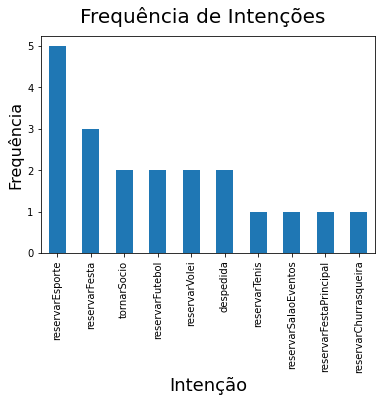

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle('Frequência de Intenções', fontsize=20)
plt.xlabel('Intenção', fontsize=18)
plt.ylabel('Frequência', fontsize=16)
df[df['intent'] != None]['intent'].value_counts().plot(ax=ax, kind='bar')

**Gráfico de Frequência de Entidades**

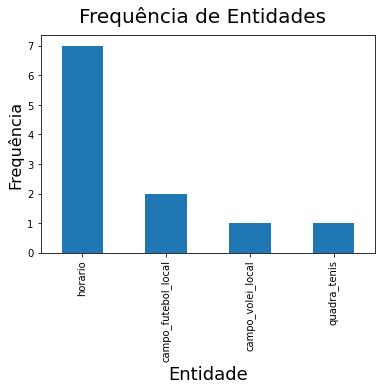

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle('Frequência de Entidades', fontsize=20)
plt.xlabel('Entidade', fontsize=18)
plt.ylabel('Frequência', fontsize=16)
df[df['entity'] != None]['entity'].value_counts().plot(ax=ax, kind='bar')

**Gráfico de Frequência dos Horários que foram escolhidos**

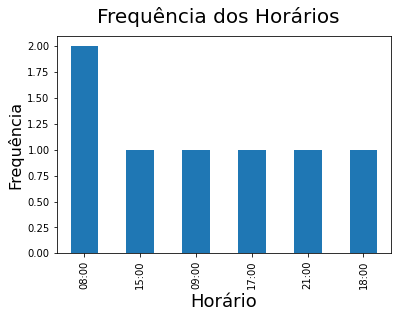

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.suptitle('Frequência dos Horários', fontsize=20)
plt.xlabel('Horário', fontsize=18)
plt.ylabel('Frequência', fontsize=16)
df[df['entity'] == 'horario']['entity_value'].value_counts().plot(ax=ax, kind='bar')